In [1]:
%load_ext autoreload

In [2]:
import times_series_learning as tsl
import server_profile_learning as spl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from datetime import datetime
import time
from logreader import read_dir
from logparser import parse_all
from loganalyzer import MessageLogAnalyzer, describe, print_description, print_clusters
import class_time_series
import pandas as pd
import numpy as np
%autoreload 



In [3]:
pwd

'/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/LogKiller'

In [4]:
LogPath = '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics'
p = class_time_series.GetServerData(LogPath)
ServerName = p.ServerList()

In [5]:
#Server present the 19/10/2017
ServerPresent1910 =ServerName.columns[ServerName.loc['2017-10-19'] !=0]
ServerPresent1910

Index(['10.60.64.53', 'airfrance.fr', 'centos.localdomain', 'g',
       'qviqbocpmg04', 'qvirbkarno10', 'qvirnascgo02', 'qvirnmonlx02',
       'qvisbcld0084', 'qvisbcld0146.novalocal', 'qvisbcldaa20',
       'qvisbcldaa22', 'qvisbcldaa35', 'qvisbcldaa36', 'qvisbcldaa38',
       'qvisbcldaa46', 'qvisbcldaa60', 'qvisbcldaa62', 'qvisbcldaa64',
       'qvisbcldaa66', 'qvisbcldaa68', 'qvisbcldaa70', 'qvisbcldaa72',
       'qvisbcldaa74', 'qvisbcldaa76', 'qvisbcldaa78', 'qvisbcloud12',
       'qvisbcloud22', 'qvisbcloud24', 'qvisbcloud28', 'qvisbcloud30',
       'qvisbcloud46', 'qvisbcloud48', 'qvisbcloud54', 'qvisbcloud58',
       'qvisbcloud64', 'qvisbcloud72', 'qvisbcloud88', 'qvisbcloud92',
       'qvisbcloud98', 'redhat.localdomain', 'tlssbcld0055',
       'tlssbcld0055.novalocal'],
      dtype='object')

In [6]:
ServerName.loc[:,ServerPresent1910]

,10.60.64.53,airfrance.fr,centos.localdomain,g,qviqbocpmg04,qvirbkarno10,qvirnascgo02,qvirnmonlx02,qvisbcld0084,qvisbcld0146.novalocal,...,qvisbcloud54,qvisbcloud58,qvisbcloud64,qvisbcloud72,qvisbcloud88,qvisbcloud92,qvisbcloud98,redhat.localdomain,tlssbcld0055,tlssbcld0055.novalocal
2017-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#best choice qvirbkarno
log_data_list = ServerName.loc[:,'qvirbkarno10'].values
log_data_list = [i for i in log_data_list if i !=0 ]
log_data_list

['/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20170930.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171001.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171002.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171003.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171004.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171006.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171008.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171010.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171011.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/log

In [8]:
#Log Clustering

analyzer = MessageLogAnalyzer()

# Import des logs
logs = read_dir('../logs/analytics/*qvirbkarno10*')

# Parsing des logs en df
df_log = parse_all(logs)

# Extraction de la partie message
X = df_log.loc[:,2:].values

# Count des fréquences verticales
X_count = analyzer.fit_count(X) # "batch"

# Obtention des labels de clustering
y = analyzer.fit_clusterize(X,X_count)

# Stockage des labels de clustering
df_log['label'] = y

df_log.to_csv('dataframe.csv')

../logs/analytics/qvirbkarno10.20171024.log
../logs/analytics/qvirbkarno10.20171004.log
../logs/analytics/qvirbkarno10.20171006.log
../logs/analytics/qvirbkarno10.20171021.log
../logs/analytics/qvirbkarno10.20171019.log
../logs/analytics/qvirbkarno10.20171008.log
../logs/analytics/qvirbkarno10.20171002.log
../logs/analytics/qvirbkarno10.20171020.log
../logs/analytics/qvirbkarno10.20170930.log
../logs/analytics/qvirbkarno10.20171026.log
../logs/analytics/qvirbkarno10.20171016.log
../logs/analytics/qvirbkarno10.20171011.log
../logs/analytics/qvirbkarno10.20171001.log
../logs/analytics/qvirbkarno10.20171003.log
../logs/analytics/qvirbkarno10.20171018.log
../logs/analytics/qvirbkarno10.20171010.log

[Sucess] 16 files loaded
[Success] Logs parsed within 0.62s
[Success] Vocabulary processed within 0.78s
[Success] 143049 Logs reduced into 70 Clusters within 9.20s


In [3]:
df_log = pd.read_csv('dataframe.csv')

In [91]:
data_train = df_log.loc[:'2017-10-19',:]
data_test = df_log.loc['2017-10-19':,:]

In [5]:
data_train.timestamp

0        2017-10-24 00:00:11
1        2017-10-24 00:00:51
2        2017-10-24 00:00:51
3        2017-10-24 00:01:01
4        2017-10-24 00:01:01
5        2017-10-24 00:01:01
6        2017-10-24 00:01:01
7        2017-10-24 00:01:01
8        2017-10-24 00:01:01
9        2017-10-24 00:01:06
10       2017-10-24 00:01:10
11       2017-10-24 00:01:10
12       2017-10-24 00:01:11
13       2017-10-24 00:01:11
14       2017-10-24 00:01:11
15       2017-10-24 00:01:11
16       2017-10-24 00:01:11
17       2017-10-24 00:01:11
18       2017-10-24 00:01:11
19       2017-10-24 00:01:11
20       2017-10-24 00:01:12
21       2017-10-24 00:01:12
22       2017-10-24 00:01:12
23       2017-10-24 00:01:12
24       2017-10-24 00:01:13
25       2017-10-24 00:01:13
26       2017-10-24 00:01:13
27       2017-10-24 00:01:13
28       2017-10-24 00:01:14
29       2017-10-24 00:01:14
                ...         
20140    2017-10-06 04:51:46
20141    2017-10-06 04:52:03
20142    2017-10-06 04:52:03
20143    2017-

In [67]:
# Server Profile Learning (data, parameters, distribution, distribution_period, level_threshold)
%autoreload 2
import sortedcontainers
period = 1
m_avg_period = 5
dist_period = 15
dist_radius = 5
parameters = np.asarray([period, m_avg_period, dist_period, dist_radius])
distribution_period = 60*24 # 1 distribution for each day
level_threshold = 1e-2 # For defining outliers
distribution =sortedcontainers.SortedDict(sortedcontainers.SortedList())

In [68]:
server_profile = spl.ServerProfileLearning(data_train,parameters, distribution,distribution_period,level_threshold)
server_profile.set_profile()

cluster number 0 of hostname: qvirbkarno10
cluster number 1 of hostname: qvirbkarno10
cluster number 5 of hostname: qvirbkarno10
cluster number 6 of hostname: qvirbkarno10
cluster number 7 of hostname: qvirbkarno10
cluster number 8 of hostname: qvirbkarno10
cluster number 9 of hostname: qvirbkarno10
cluster number 10 of hostname: qvirbkarno10
cluster number 11 of hostname: qvirbkarno10
cluster number 12 of hostname: qvirbkarno10
cluster number 13 of hostname: qvirbkarno10
cluster number 14 of hostname: qvirbkarno10
cluster number 15 of hostname: qvirbkarno10
cluster number 16 of hostname: qvirbkarno10
cluster number 17 of hostname: qvirbkarno10
cluster number 18 of hostname: qvirbkarno10
cluster number 19 of hostname: qvirbkarno10
cluster number 20 of hostname: qvirbkarno10
cluster number 21 of hostname: qvirbkarno10
cluster number 22 of hostname: qvirbkarno10
cluster number 23 of hostname: qvirbkarno10
cluster number 24 of hostname: qvirbkarno10
cluster number 26 of hostname: qvirbkar

In [70]:
server_profile.server_profile.keys()

dict_keys(['qvirbkarno10_general', 'qvirbkarno10_0', 'qvirbkarno10_1', 'qvirbkarno10_5', 'qvirbkarno10_6', 'qvirbkarno10_7', 'qvirbkarno10_8', 'qvirbkarno10_9', 'qvirbkarno10_10', 'qvirbkarno10_11', 'qvirbkarno10_12', 'qvirbkarno10_13', 'qvirbkarno10_14', 'qvirbkarno10_15', 'qvirbkarno10_16', 'qvirbkarno10_17', 'qvirbkarno10_18', 'qvirbkarno10_19', 'qvirbkarno10_20', 'qvirbkarno10_21', 'qvirbkarno10_22', 'qvirbkarno10_23', 'qvirbkarno10_24', 'qvirbkarno10_26', 'qvirbkarno10_27', 'qvirbkarno10_30', 'qvirbkarno10_39', 'qvirbkarno10_42', 'qvirbkarno10_44', 'qvirbkarno10_46', 'qvirbkarno10_51', 'qvirbkarno10_61', 'qvirbkarno10_62', 'qvirbkarno10_68'])

In [82]:
len(server_profile.server_profile.keys())

34

In [72]:
server_profile.server_profile['qvirbkarno10_general'].max_spread

113

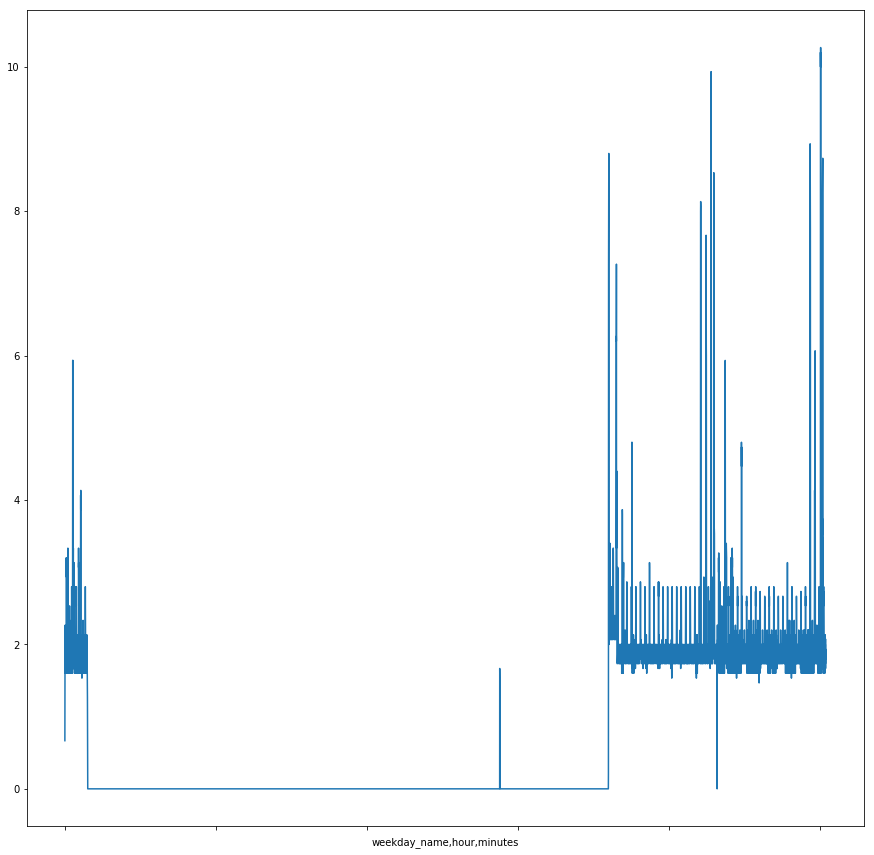

In [75]:
plt.figure(figsize=(15,15))
server_profile.server_profile['qvirbkarno10_general'].profile.plot()

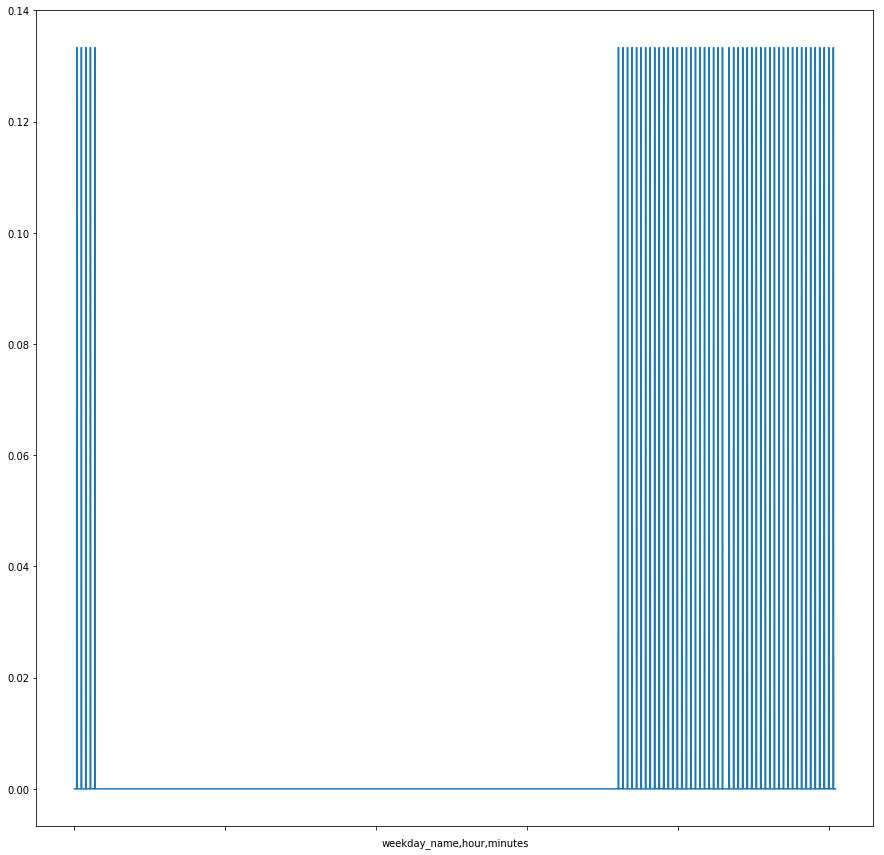

In [90]:
plt.figure(figsize=(15,15))
server_profile.server_profile['qvirbkarno10_1'].profile.plot()

In [88]:
np.unique(data_train['label'].values)

array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 26, 27, 30, 39, 42, 44, 46, 51, 61, 62, 68])

In [92]:
np.unique(data_test['label'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34,
       35, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69])

In [ ]:
# distance distribution
